In [1]:
import pandas as pd
import os
res = os.path.abspath(os.path.join(os.getcwd(), os.pardir,'results'))
os.chdir(res)
all = pd.DataFrame()
for i in os.listdir():
    if i != 'all.csv' and i[-3:]=='csv' :
        temp= pd.read_csv(i)
        all = pd.concat([all,temp])
    else:
        all=pd.read_csv('all.csv')
        break
all.set_index('Model',inplace=True)
all.round(2).to_csv('all.csv')

In [2]:
all.sort_values('MAPE')

,Features,RMSE,MAPE,MAE,Differencing,Time
Model,,,,,,
MLP,Quarantines,44.48,0.28,28.85,False,0:00:00.095
AdaBoost,Covid,44.98,0.28,28.52,False,0:00:00.220
AdaBoost,None,44.65,0.28,27.87,False,0:00:00.160
AdaBoost,Time,44.94,0.28,28.15,False,0:00:00.236
HGBoost,Time,43.56,0.29,28.67,False,0:00:00.755
HGBoost,None,44.19,0.29,28.73,False,0:00:00.483
AdaBoost,Quarantines,45.70,0.29,29.38,False,0:00:00.171
HGBoost,Quarantines,45.02,0.30,29.23,False,0:00:00.598
HGBoost,Covid,45.55,0.30,30.32,False,0:00:00.611


In [3]:
for bool in [True, False]:
    temp = pd.DataFrame()
    for i in ['RMSE','MAPE','MAE']:
        foo = all.query(f'Differencing=={bool}').groupby('Features')[i].idxmin()
        temp = pd.concat([temp, pd.DataFrame(foo).rename(columns={i:'Models'})])
    print(f'Diffencing: {bool}')
    print(temp.groupby('Features').value_counts())
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

Diffencing: True
Features     Models  
Covid        Arima       3
None         Arima       2
             BDLSTM      1
Quarantines  AdaBoost    1
             Arima       1
             HGBoost     1
Time         Arima       2
             MLP         1
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Diffencing: False
Features     Models  
Covid        AdaBoost    3
None         AdaBoost    2
             HGBoost     1
Quarantines  MLP         3
Time         AdaBoost    2
             HGBoost     1
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [4]:
temp = all.copy()

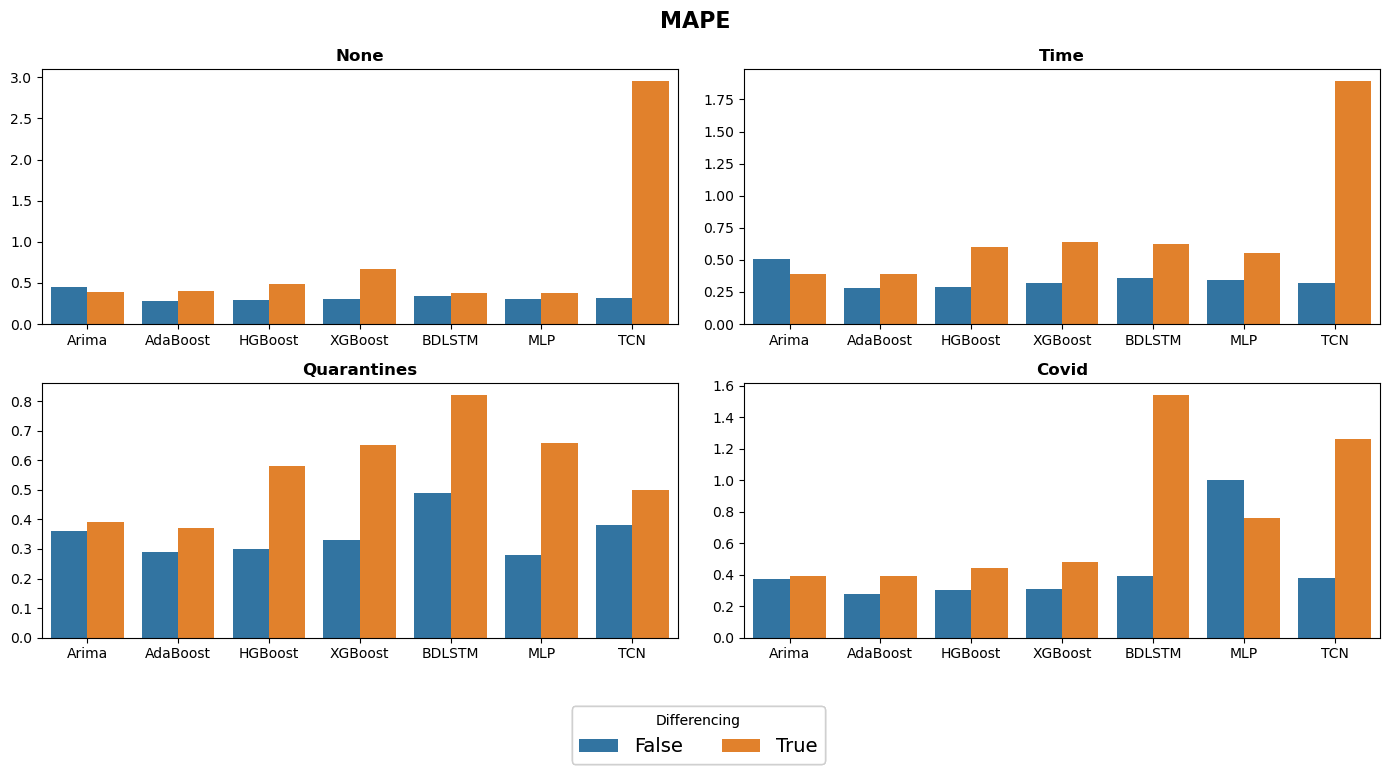

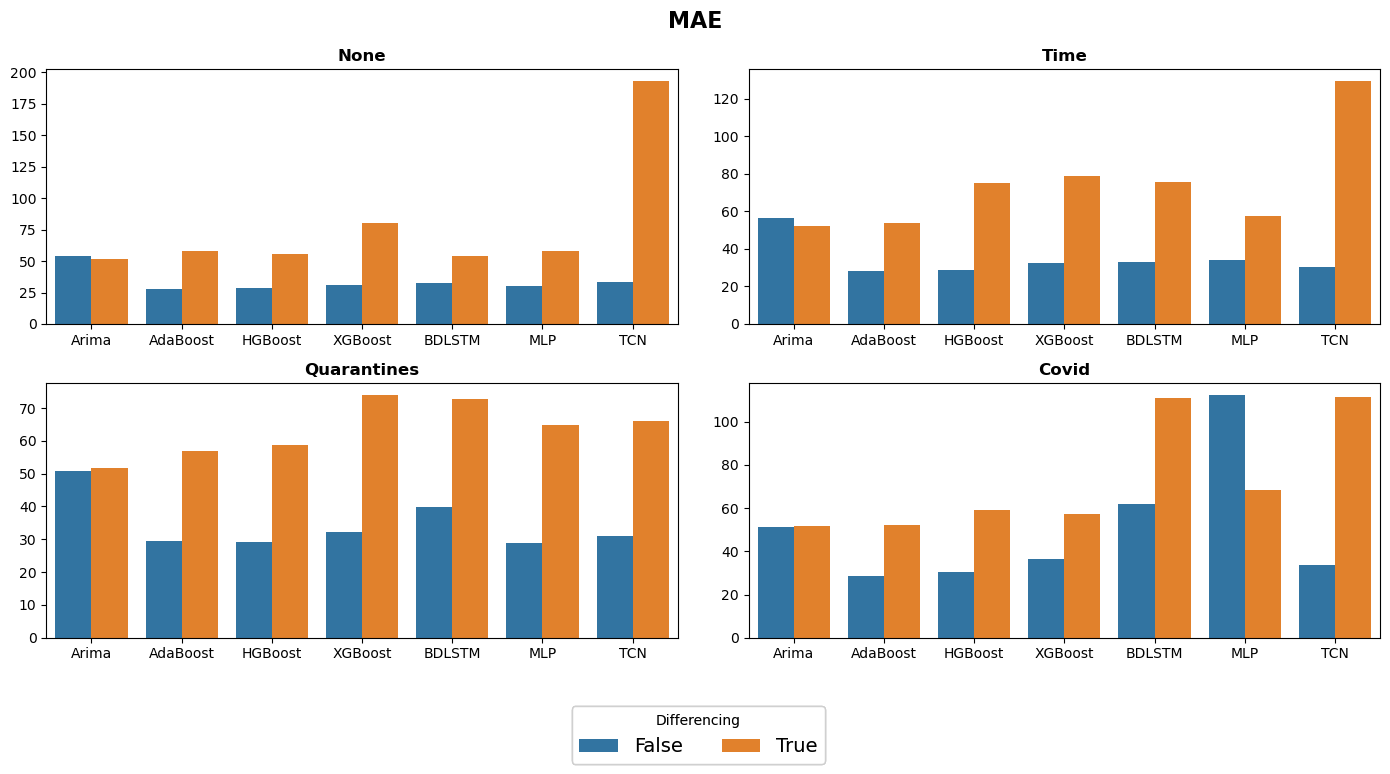

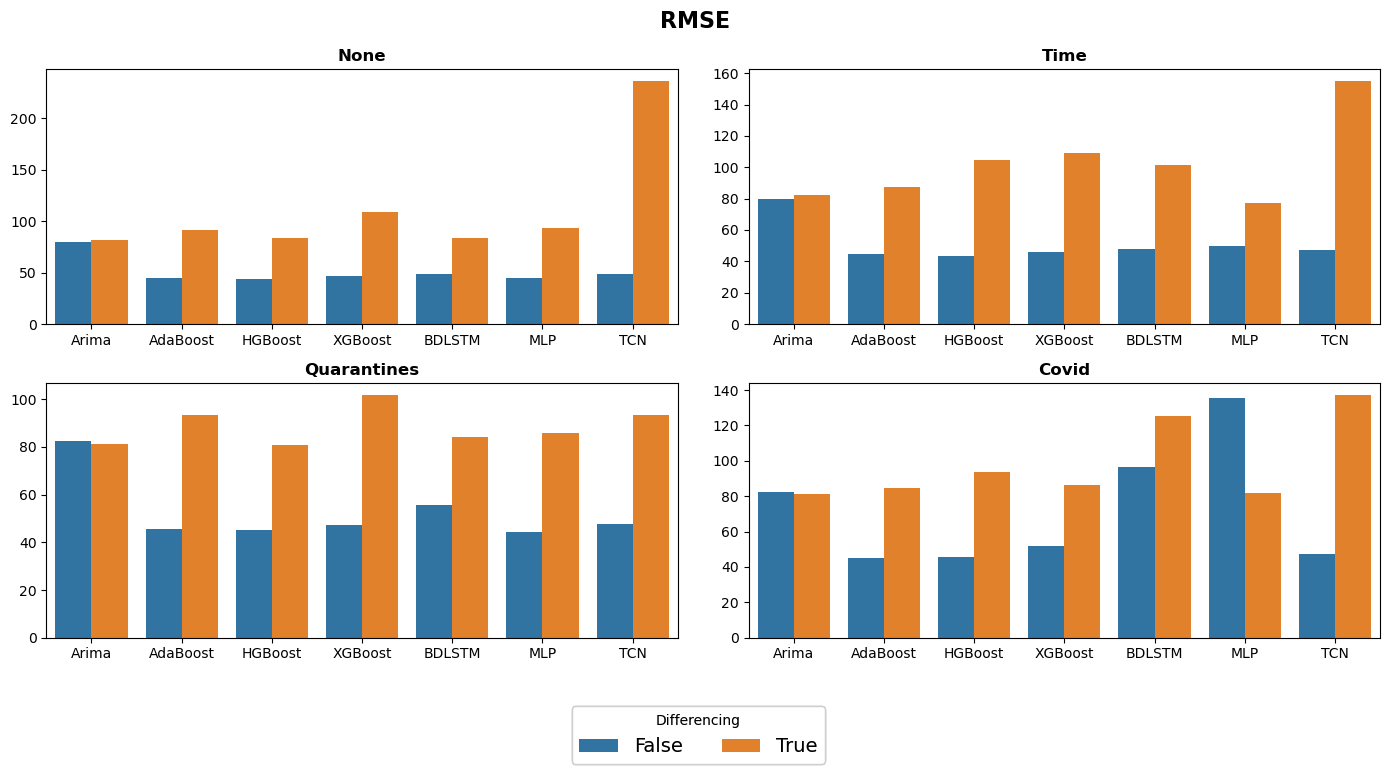

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns
all = temp.copy()

for metric in ['MAPE','MAE','RMSE']:
    fig = plt.figure(figsize=(14, 7))
    fig.suptitle(metric, fontsize=16, fontweight='bold')
    for index, i in enumerate(all.Features.unique()):
        ax = plt.subplot(2, 2, index+1)
        foo = sns.barplot(data=all.loc[all.Features==i].reset_index(), x='Model', y=metric, hue='Differencing', ax=ax)
        legend_handles, legend_labels = foo.get_legend_handles_labels()
        plt.tight_layout()
        plt.figlegend( legend_handles, legend_labels, title='Differencing', bbox_to_anchor=(0.6,0), ncol=2, labelspacing=0.5, prop={'size': 14})
        ax.set_title(i, fontweight='bold')
        ax.set_ylabel('')
        ax.set_xlabel('')

        foo.get_legend().remove()
    # fig.savefig(f'{metric}.png')